In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import numpy as np

In [3]:
personal_data = pd.read_csv("customer_data.csv")
campaign_data = pd.read_csv("campaign_data.csv")
campaign_data[['AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response']].astype(int)
campaign_data["Total Accept"] = campaign_data[['AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response']].sum(axis=1)
join = personal_data.merge(campaign_data, on = 'index', how = "inner")
join

,index,Income,Kidhome,Teenhome,Recency,Complain,Age,Customer_Days,marital_Divorced,marital_Married,...,education_Graduation,education_Master,education_PhD,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Total Accept
0,0,58138.0,0,0,58,0,63,2822,0,0,...,1,0,0,0,0,0,0,0,1,1
1,1,46344.0,1,1,38,0,66,2272,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,71613.0,0,0,26,0,55,2471,0,0,...,1,0,0,0,0,0,0,0,0,0
3,3,26646.0,1,0,26,0,36,2298,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4,58293.0,1,0,94,0,39,2320,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,0,53,2540,0,1,...,1,0,0,0,0,0,0,0,0,0
2201,2201,64014.0,2,1,56,0,74,2178,0,0,...,0,0,1,1,0,0,0,0,0,1
2202,2202,56981.0,0,0,91,0,39,2314,1,0,...,1,0,0,0,0,0,1,0,0,1
2203,2203,69245.0,0,1,8,0,64,2315,0,0,...,0,1,0,0,0,0,0,0,0,0


In [4]:
personal_data_column = personal_data.drop(columns=["index", 'marital_Divorced',
 'marital_Married',
 'marital_Single',
 'marital_Together',
 'marital_Widow',
 'education_2n Cycle',
 'education_Basic',
 'education_Graduation',
 'education_Master',
 'education_PhD']).columns.to_list()
campaign_data_column = campaign_data.drop(columns="index").columns.to_list()
campaign_data_column

['AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'Response',
 'Total Accept']

In [5]:

correlation_matrix = join[personal_data_column + campaign_data_column].corr()
correlation_with_campaigns = correlation_matrix.loc[personal_data_column, campaign_data_column]
# correlation_with_campaigns["Average campaign"] = correlation_with_campaigns[['AcceptedCmp3',
#  'AcceptedCmp4',
#  'AcceptedCmp5',
#  'AcceptedCmp1',
#  'AcceptedCmp2',
#  'Response']].mean(axis = 1)
correlation_with_campaigns.sort_values(by = "Total Accept", axis = 0, ascending=False)

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Total Accept
Income,0.345242,0.110210,-0.011181,0.233267,0.416386,0.174902,0.365540
Customer_Days,-0.040197,0.006021,-0.007952,0.015723,-0.004550,0.196520,0.069427
Age,0.011747,0.007737,-0.061405,0.069903,-0.019275,-0.021305,-0.007371
Complain,-0.025101,-0.011236,0.009535,-0.027120,-0.008464,-0.000273,-0.016091
Recency,-0.021097,-0.001390,-0.032327,0.017658,0.000334,-0.200413,-0.090437
Teenhome,-0.145748,-0.015805,-0.043223,0.037860,-0.190760,-0.155196,-0.161300
Kidhome,-0.174741,-0.082124,0.015897,-0.162597,-0.205124,-0.078409,-0.192813


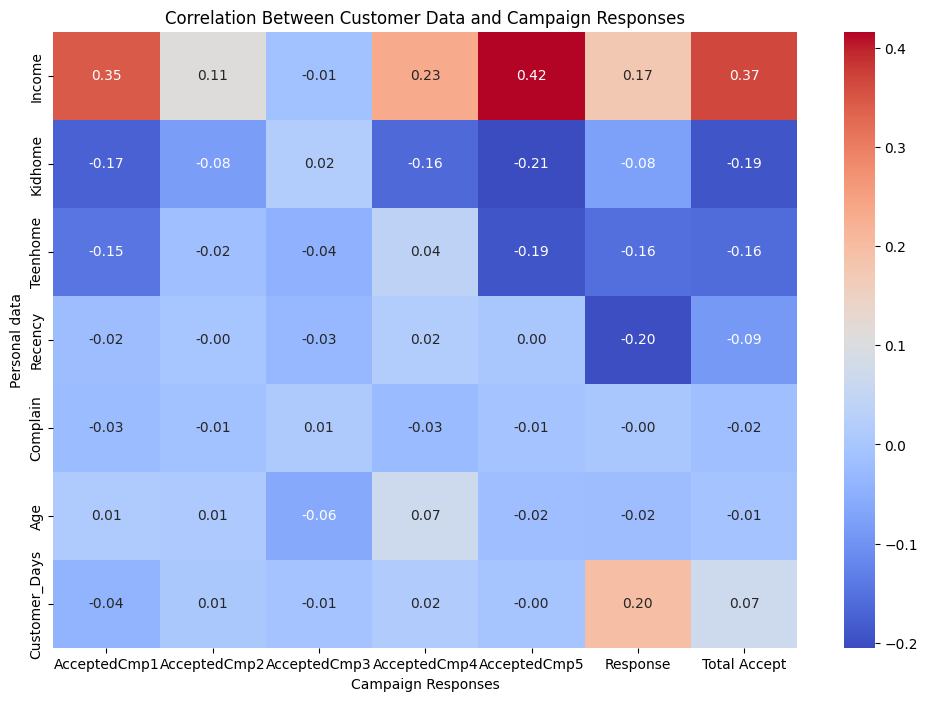

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_with_campaigns, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Between Customer Data and Campaign Responses')
plt.xlabel('Campaign Responses')
plt.ylabel('Personal data')
plt.show()

In [7]:
X_personal = join[personal_data_column]
y_personal = join["Total Accept"]

In [8]:
def tree_classifier_level(i, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)


    # print(f"Accuracy of level {i}: {accuracy:.2f}")  
    return clf.score(X_train, y_train), clf.score(X_test, y_test), accuracy



In [9]:
def find_best_depth():
    train_scores=[]
    test_scores=[]
    accuracy_list = []
    total_score = {
        "Depth": range(1, 21)
    }
    total_score  = pd.DataFrame(total_score)

    r=range(1,20)
    for i in range(1, 20):
        train_scores_i, test_scores_i, accuracy_list_i = tree_classifier_level(i, X_personal, y_personal)
        train_scores.append(train_scores_i)
        test_scores.append(test_scores_i)
        accuracy_list.append(accuracy_list_i)
        total_score.loc[total_score["Depth"] == i, "Total Score"] = abs(train_scores_i - test_scores_i)
    
    
    return [total_score.iloc[total_score["Total Score"].idxmin()]["Depth"], train_scores, test_scores, accuracy_list]

[0.7193778353856124, 0.729099157485418, 0.7336357744653272, 0.7602073882047958, 0.7498379779650033, 0.7705767984445885, 0.7939079714841218, 0.830848995463383, 0.8366817887232664, 0.8878807517822424, 0.9001944264419961, 0.9066753078418665, 0.9261179520414776, 0.9552819183408944, 0.966299416720674, 0.9760207388204796, 0.9812054439403759, 0.9734283862605314, 0.9928710304601426] [0.7416918429003021, 0.7311178247734139, 0.7326283987915407, 0.6918429003021148, 0.7039274924471299, 0.729607250755287, 0.6903323262839879, 0.6782477341389728, 0.6873111782477341, 0.675226586102719, 0.6722054380664653, 0.6737160120845922, 0.6691842900302115, 0.6374622356495468, 0.6404833836858006, 0.6148036253776435, 0.6253776435045317, 0.6329305135951662, 0.648036253776435] [0.7416918429003021, 0.7311178247734139, 0.7326283987915407, 0.6918429003021148, 0.7039274924471299, 0.729607250755287, 0.6903323262839879, 0.6782477341389728, 0.6873111782477341, 0.675226586102719, 0.6722054380664653, 0.6737160120845922, 0.669

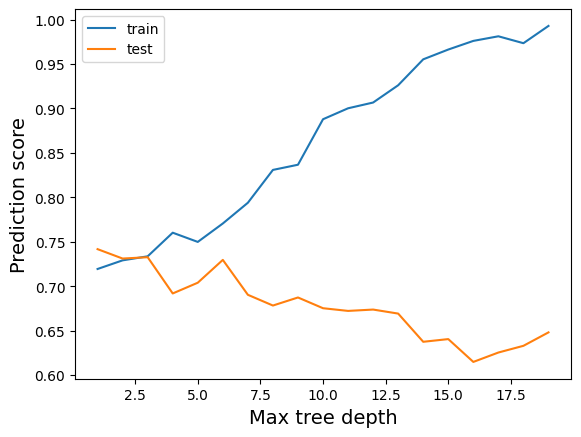

In [10]:
finc_res = find_best_depth()
train_scores, test_scores, accuracy_list = finc_res[1], finc_res[2], finc_res[3]
print(train_scores, test_scores, accuracy_list)
r = range(1, 20)
fig, ax = plt.subplots(1)
sns.lineplot(x=r,y=train_scores,label='train')
sns.lineplot(x=r,y=test_scores,label='test')
ax.set_ylabel('Prediction score', fontsize=14)
ax.set_xlabel('Max tree depth', fontsize=14)
ax.legend()

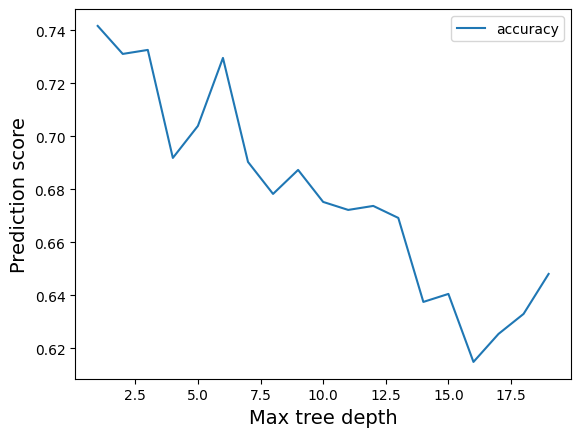

In [11]:
fig, ax = plt.subplots(1)
sns.lineplot(x=r, y=accuracy_list,label='accuracy')
ax.set_ylabel('Prediction score', fontsize=14)
ax.set_xlabel('Max tree depth', fontsize=14)
ax.legend()

In [12]:
best_depth_list = []
for i in range(1, 100):
    best_depth_list.append(find_best_depth()[0])

<Axes: ylabel='Count'>

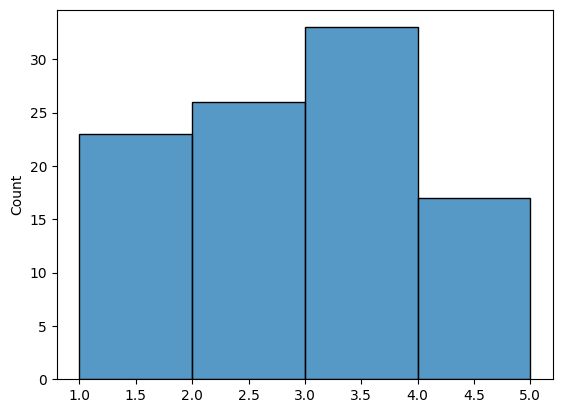

In [13]:
sns.histplot(data = best_depth_list, binwidth=1)

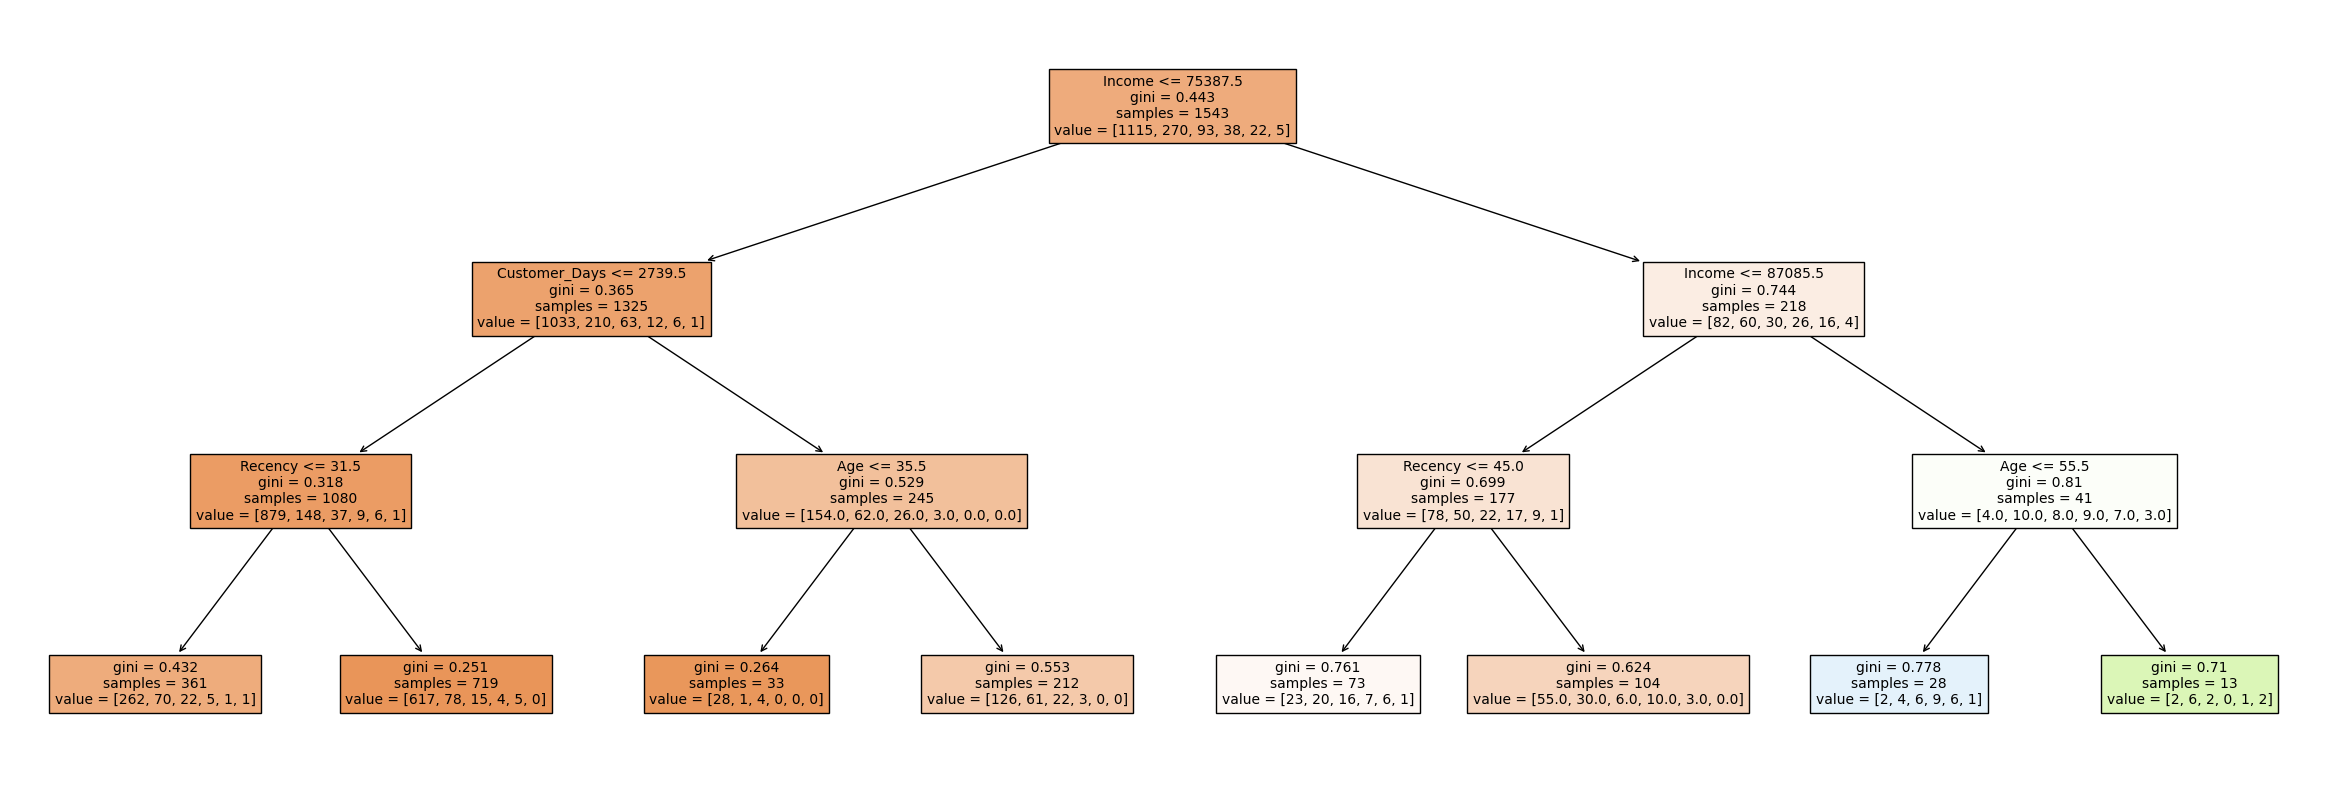

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_personal, y_personal, test_size=0.3)
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
plt.figure(figsize=(30, 10))
p = plot_tree(clf, filled = True, feature_names = X_personal.columns)
plt.show()


AB testing

In [15]:
from scipy.stats import ttest_ind


In [16]:
AB_raw = personal_data.filter(['marital_Divorced',
 'marital_Married',
 'marital_Single',
 'marital_Together',
 'marital_Widow',
 'education_2n Cycle',
 'education_Basic',
 'education_Graduation',
 'education_Master',
 'education_PhD']).astype(int)
AB_test_list = ['marital_Divorced',
 'marital_Married',
 'marital_Single',
 'marital_Together',
 'marital_Widow',
 'education_2n Cycle',
 'education_Basic',
 'education_Graduation',
 'education_Master',
 'education_PhD']
AB_raw["acceptTF"] = (join["Total Accept"] >= 1).astype(int)
AB_raw

,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,acceptTF
0,0,0,1,0,0,0,0,1,0,0,1
1,0,0,1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2200,0,1,0,0,0,0,0,1,0,0,0
2201,0,0,0,1,0,0,0,0,0,1,1
2202,1,0,0,0,0,0,0,1,0,0,1
2203,0,0,0,1,0,0,0,0,1,0,0


In [35]:

def AB_testing(data, test_column, result_column, result):
    group_a = data[data[test_column] == 0][result_column]
    group_b = data[data[test_column] == 1][result_column]

    t_stat, p_value = ttest_ind(group_a, group_b)

    result.loc[result["Tests"] == test_column, "t_stat"] = t_stat
    if p_value > 0.5:
        result.loc[result["Tests"] == test_column, "p_value"] = 1 - p_value
    else:
        result.loc[result["Tests"] == test_column, "p_value"] =  p_value



In [36]:

AB_result = {"Tests": ['marital_Divorced',
 'marital_Married',
 'marital_Single',
 'marital_Together',
 'marital_Widow',
 'education_2n Cycle',
 'education_Basic',
 'education_Graduation',
 'education_Master',
 'education_PhD']}
AB_result = pd.DataFrame(AB_result)
for f in AB_test_list:
    AB_testing(AB_raw, f, "acceptTF", AB_result)


AB_result

,Tests,t_stat,p_value
0,marital_Divorced,-0.936759,0.348985
1,marital_Married,1.758060,0.078876
2,marital_Single,-2.244376,0.024907
3,marital_Together,1.374527,0.169418
4,marital_Widow,-1.356357,0.175125
5,education_2n Cycle,1.542938,0.122989
6,education_Basic,2.409328,0.016063
7,education_Graduation,0.847501,0.396808
8,education_Master,0.091016,0.072512
9,education_PhD,-3.094078,0.001999


/var/folders/2k/z1qr202s5kn8gjb943s4jrpr0000gn/T/ipykernel_66660/984440154.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Tests", y="t_stat", data=AB_result, palette="coolwarm", edgecolor="black")


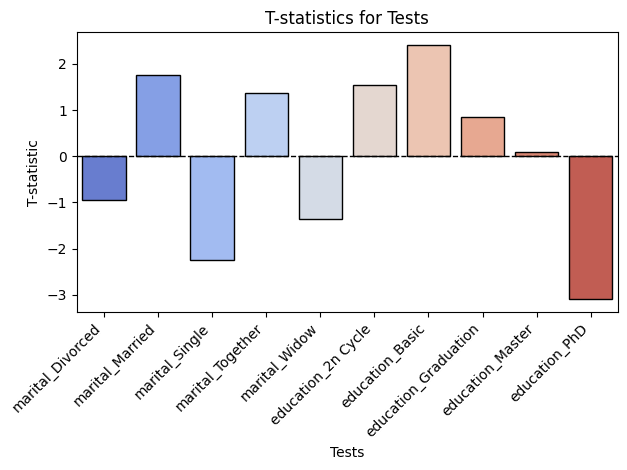

In [37]:
sns.barplot(x="Tests", y="t_stat", data=AB_result, palette="coolwarm", edgecolor="black")
plt.xticks(rotation=45, ha="right")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.title("T-statistics for Tests")
plt.xlabel("Tests")
plt.ylabel("T-statistic")
plt.tight_layout()

/var/folders/2k/z1qr202s5kn8gjb943s4jrpr0000gn/T/ipykernel_66660/4069470451.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Tests", y="p_value", data=AB_result, palette="coolwarm", edgecolor="black")


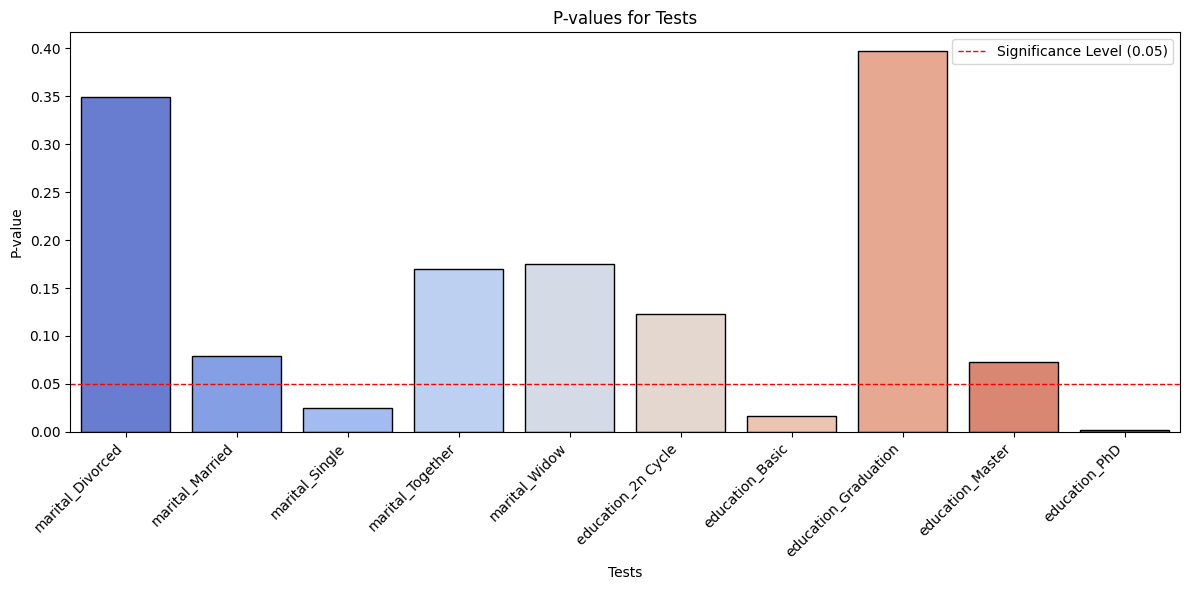

In [38]:
# Plot the p-values using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x="Tests", y="p_value", data=AB_result, palette="coolwarm", edgecolor="black")
plt.xticks(rotation=45, ha="right")
plt.axhline(0.05, color="red", linestyle="--", linewidth=1, label="Significance Level (0.05)")
plt.title("P-values for Tests")
plt.xlabel("Tests")
plt.ylabel("P-value")
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()


KNN

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score


features = join[personal_data_column]
target = join["Total Accept"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify=target)

# Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

# Model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6963746223564955
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       481
           1       0.24      0.13      0.17       110
           2       0.20      0.05      0.08        42
           3       0.17      0.07      0.10        15
           4       0.50      0.09      0.15        11
           5       0.00      0.00      0.00         3

    accuracy                           0.70       662
   macro avg       0.31      0.21      0.22       662
weighted avg       0.62      0.70      0.64       662



In [21]:
from sklearn.model_selection import GridSearchCV

# Tune hyperparameters
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'n_neighbors': 30, 'p': 2, 'weights': 'distance'}


In [22]:
# Retrain the model with the optimal parameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=30, weights='distance')

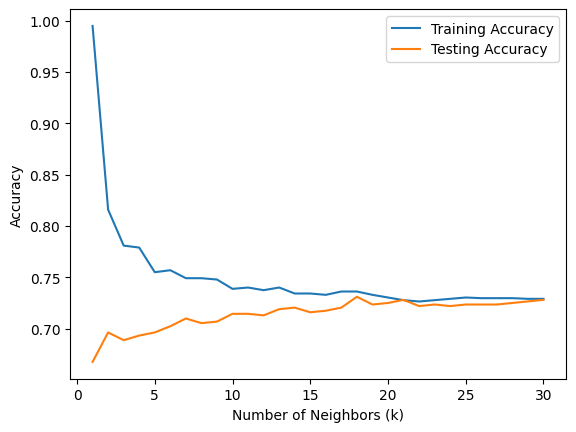

In [23]:
# Visualization of the results
k_values = range(1, 31)
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_accuracies.append(knn.score(X_train_scaled, y_train))
    test_accuracies.append(knn.score(X_test_scaled, y_test))

plt.plot(k_values, train_accuracies, label='Training Accuracy')
plt.plot(k_values, test_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
# Input new data into the model for prediction
new_data = personal_data[personal_data_column]
new_data_scaled = scaler.transform(new_data)

predictions = best_knn.predict(new_data_scaled)

In [25]:
new_data['PredictedAcceptance'] = predictions
new_data['NextCampaignTarget'] = ['yes' if pred >= 3 else 'no' for pred in predictions]
output_result = 'customer_knn_prediction_results.csv'
new_data.to_csv(output_result, index=False)

output_result

/var/folders/2k/z1qr202s5kn8gjb943s4jrpr0000gn/T/ipykernel_66660/2982325644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['PredictedAcceptance'] = predictions
/var/folders/2k/z1qr202s5kn8gjb943s4jrpr0000gn/T/ipykernel_66660/2982325644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['NextCampaignTarget'] = ['yes' if pred >= 3 else 'no' for pred in predictions]


'customer_knn_prediction_results.csv'